In [1]:
#basic python functionality 
import copy
from collections import Counter
#import regex as re
import re

#data science libraries 
import pandas as pd
import numpy as np
import scipy 

#for base nlp functionality 
import spacy
from spacy.tokens import Doc
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA
from spacy.matcher import Matcher
from spacy.util import filter_spans

#plotting 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.cluster.hierarchy import dendrogram, linkage

#for sentiment analysis 
from transformers import pipeline


#import Document object, the "brains" of everything being done 
from DocumentWorking import Document 
import sys, importlib

nlp = spacy.load("en_core_web_lg")


/home/blitt/.local/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_lg' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [69]:
#use this whenever we need to reload the Document object 
import importlib
imported_module = importlib.import_module("DocumentWorking")
importlib.reload(imported_module)
from DocumentWorking import *

In [70]:
#load in the data, create splits in the data according to three columns 
doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv",nlp, subsetColumns=["Persona", "Engagement", "Touchpoint"])

# ---------------WORD COUNTING-----------------------

### basic bar charts 

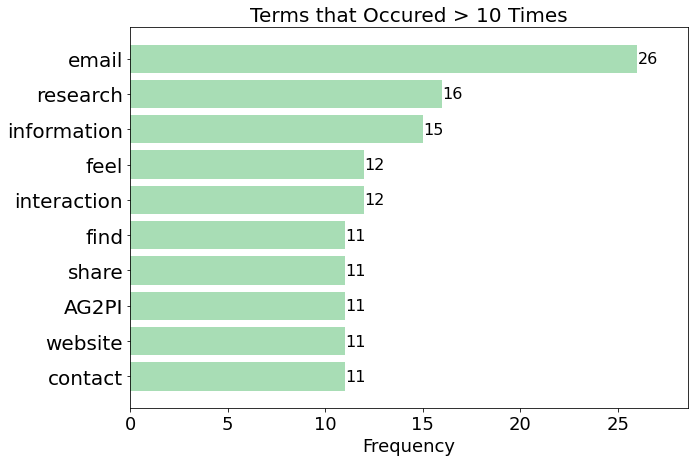

In [60]:
#get frequencies of top 10 lemmas 
tenDict = doc.getFreqDictCutoff(doc.importantLemmas, 10)

#plot basic bar chart, get matplotlib figure object so we can add our styling 
#dimensions is an optional keyword to set figure dimensions
#we can pass any key word arguments that would get passed to plt.barh() to this function, such as color
myFig = doc.freqDictBarChart(tenDict[0], dimensions=(10, 7), color="#a8ddb5")
ax = myFig.gca()

#STYLING
#set titles and tick sizes 
ax.set_title("Terms that Occured > 10 Times", size = 20)
ax.set_xlabel("Frequency", size=18)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=18)

#to mess with bar length labels look at this answer on stack overflow, can be modified 
#by calling ax.bar_label() again or modifying code in the Document object (not reccomended)
#example on: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart/67561982#67561982


[Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '26')]

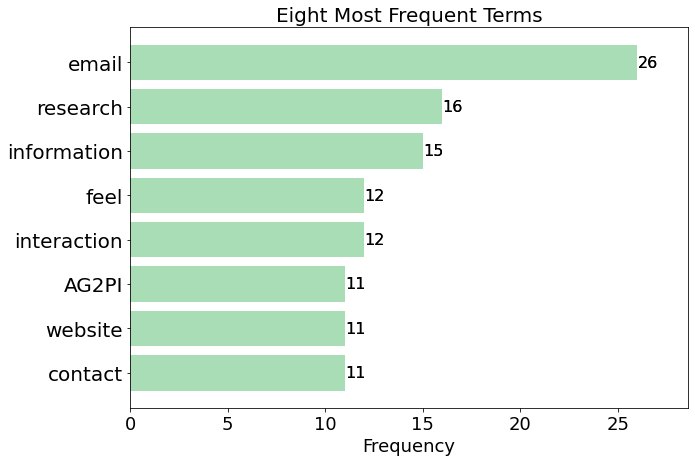

In [61]:
#get frequencies of top 10 lemmas 
topEight = doc.getTopFew(doc.importantLemmas, 8)

#plot basic bar chart, get matplotlib figure object so we can add our styling 
#dimensions is an optional keyword to set figure dimensions
#we can pass any key word arguments that would get passed to plt.barh() to this function, such as color
myFig = doc.freqDictBarChart(topEight, dimensions=(10, 7), color="#a8ddb5")
ax = myFig.gca()

#STYLING
#set titles and tick sizes 
ax.set_title("Eight Most Frequent Terms", size = 20)
ax.set_xlabel("Frequency", size=18)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=18)

#just copy this code when adding bar value labels 
#example on: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart/67561982#67561982
ax.margins(x=.1)
ax.bar_label(ax.containers[0], fontsize=16)

### Basic word clouds

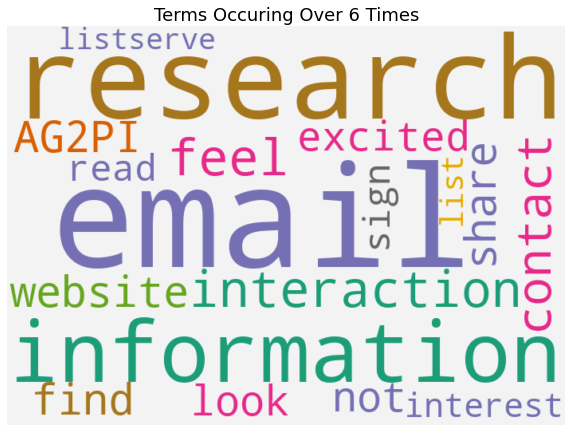

In [62]:
#create a basic wordcloud with standard coloring 
#then we can show the fancy matching down below 
tenDict = doc.getFreqDictCutoff(doc.importantLemmas, 6)

#check out documentation comments for how the dimensions works
#basically dimensions creates a box of a given size and wcDimensions determines the proportions of the 
#wordcloud that is then stretched to fit into that box 
fig = doc.wordCloud(tenDict[0], dimensions=(10, 10), wcDimensions=(700, 500))

ax = fig.gca()
ax.set_title("Terms Occuring Over 6 Times", size=18)
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/polishedJul21/WCOver6.jpg", bbox_inches="tight", dpi=800)

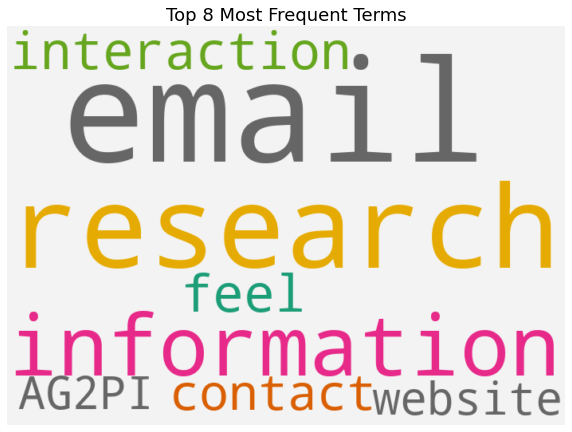

In [7]:
topEight = doc.getTopFew(doc.importantLemmas, 8)


#check out documentation comments for how the dimensions works
#basically dimensions creates a box of a given size and wcDimensions determines the proportions of the 
#wordcloud that is then stretched to fit into that box 
fig = doc.wordCloud(topEight, dimensions=(10, 10), wcDimensions=(700, 500))

ax = fig.gca()
ax.set_title("Top 8 Most Frequent Terms", size=18)
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/polishedJul21/WCTop8.jpg", bbox_inches="tight", dpi=800)

### Bar chart and word cloud with matching colors 

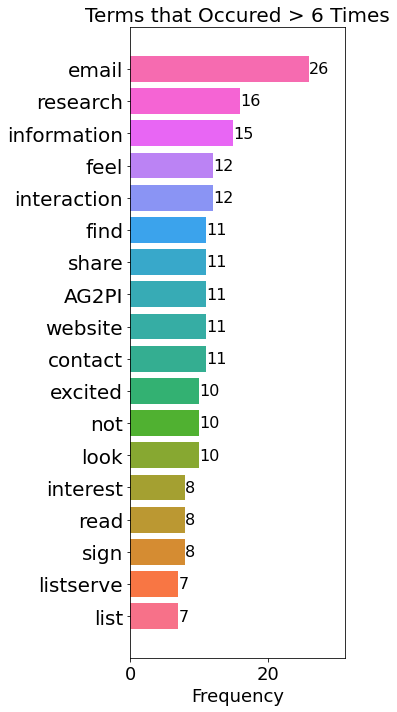

In [8]:

tenDict = doc.getFreqDictCutoff(doc.importantLemmas, 6)
myFig = doc.coloredFreqDictBarChart(tenDict[0], dimensions=(5, 10))
ax = myFig.gca()

#Most Frequent Terms by color 
#set titles and tick sizes 
ax.set_title("Terms that Occured > 6 Times", size = 20)
ax.set_xlabel("Frequency", size=18)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=18)

#add margin so that label doesn't run over edge 
ax.bar_label(ax.containers[0], fontsize=16)
ax.margins(x=0.2)

plt.tight_layout()
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/polishedJul21/coloredFreqsOver6.jpg", bbox_inches="tight")
plt.show()

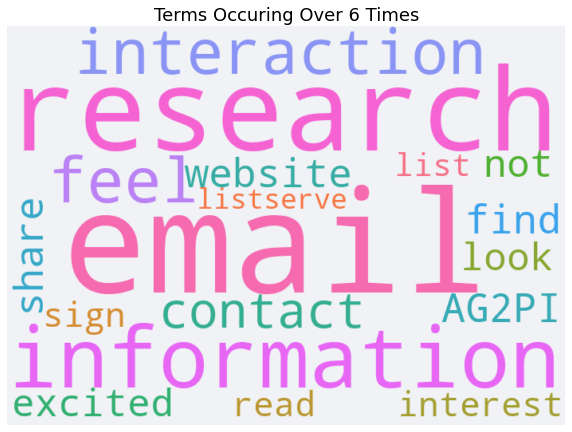

In [9]:
tenDict = doc.getFreqDictCutoff(doc.importantLemmas, 6)

#check out documentation comments for how the dimensions works
#basically dimensions creates a box of a given size and wcDimensions determines the proportions of the 
#wordcloud that is then stretched to fit into that box 
fig = doc.wordCloudMatching(tenDict[0], dimensions=(10, 10), wcDimensions=(700, 500))

ax = fig.gca()
ax.set_title("Terms Occuring Over 6 Times", size=18)

plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/polishedJul21/coloredWCOver6.jpg", bbox_inches="tight", dpi=800)



# ------------------SPLIT BY GROUPS-------------------------

### Over threshold version 

num of cats: 4
max values array: [ 3  1  5 19]


Text(0.5, 0.98, 'Word Counts by Persona')

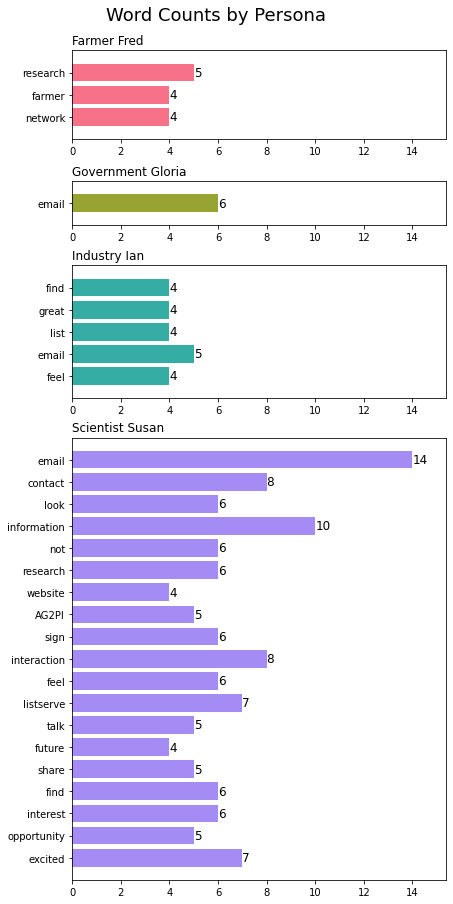

In [71]:
#get lemmas split by values in the Persona Column 
lemmaDict = doc.getColSubAttributeDict("Persona", "importantLemmas")

#get count dictionary (will get one per value of Persona) with counts over three 
#this function works automatically 
countDict = doc.getFreqDictCutoff(lemmaDict, 3)

#these defaults are a bit touchy, best to leave them alone (especially top and bottom) unless they need to be changed 
#NOTE: to mess around with sizing of things get the axes 
#barwidth = inch per bar
#spacing = spacing between subplots in units of barwidth
#figx = figure width in inch
#top = an additional top margin 
#bottom = an additional bottom margin 
#left = left margin in units of bar width
#right = right margin in units of bar width
fig = doc.freqDictBarChartColumnSplit(countDict,.3, 2, 10, 1, 0, 10, 6)
fig.suptitle("Word Counts by Persona", fontsize=18)

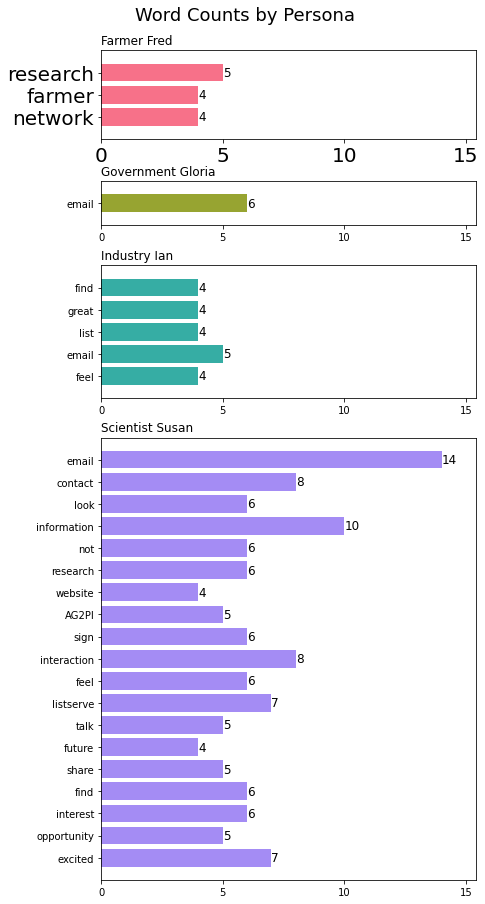

In [72]:
#here is an example of changing the size of the tick labels 

#get the axes objects as a list 
axes = fig.axes

#get the 0th axes, change the tick params 
#lot's of ways to do this, look at documentation for axes and axis objects at: 
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
#would want to loop through all in real world case, might have to adjust padding as well 
axes[0].tick_params(axis="both", labelsize=20)
fig

num of cats: 6
max values array: [2 1 4 6 9 1]


Text(0.5, 0.98, 'Word Counts > 3 by Touchpoint')

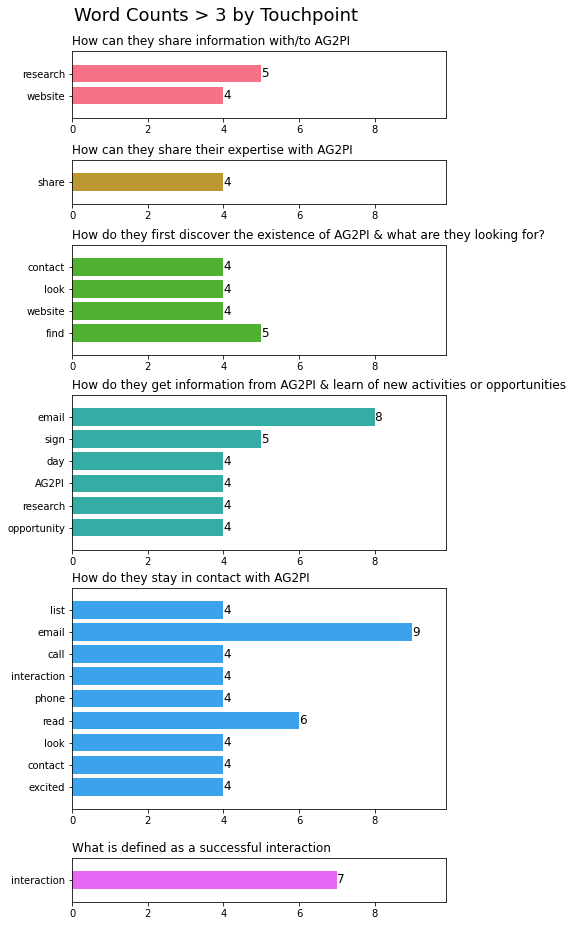

In [73]:
#get lemmas split by values in the Persona Column 
lemmaDict = doc.getColSubAttributeDict("Touchpoint", "importantLemmas")

#get count dictionary (will get one per value of Persona) with counts over three 
#this function works automatically 
countDict = doc.getFreqDictCutoff(lemmaDict, 3)

#these defaults are a bit touchy, best to leave them alone (especially top and bottom) unless they need to be changed 
fig= doc.freqDictBarChartColumnSplit(countDict,.3, 2, 10, 1, 0, 10, 6)
fig.suptitle("Word Counts > 3 by Touchpoint", fontsize=18)

In [ ]:
#TODO: address what would happen if we had zero words over threshold, rn we are getting empty box 
#TODO: add numbers to bars 

### Top XX Terms version 

num of cats: 4
max values array: [5 5 5 5]


Text(0.5, 0.98, 'Top 5 Terms by Persona')

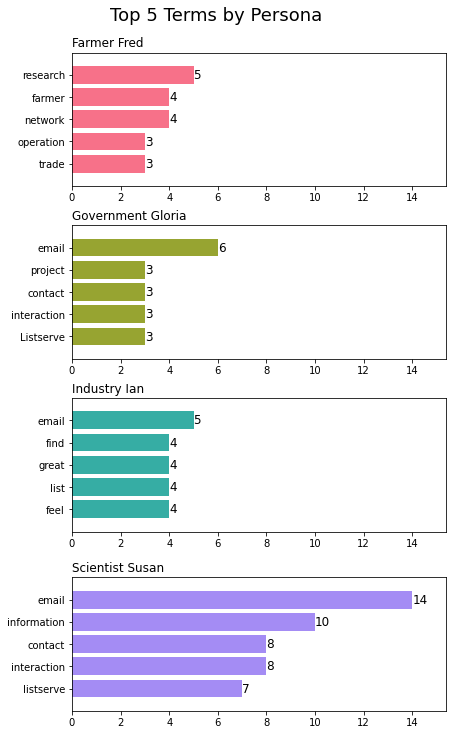

In [74]:
#get lemmas split by values in the Persona Column 
lemmaDict = doc.getColSubAttributeDict("Persona", "importantLemmas")
top4 = doc.getTopFew(lemmaDict, 5)
fig= doc.freqDictBarChartColumnSplit(top4,.3, 2, 10, 1, 0, 10, 6)
fig.suptitle("Top 5 Terms by Persona", fontsize=18)

num of cats: 6
max values array: [5 5 5 5 5 5]


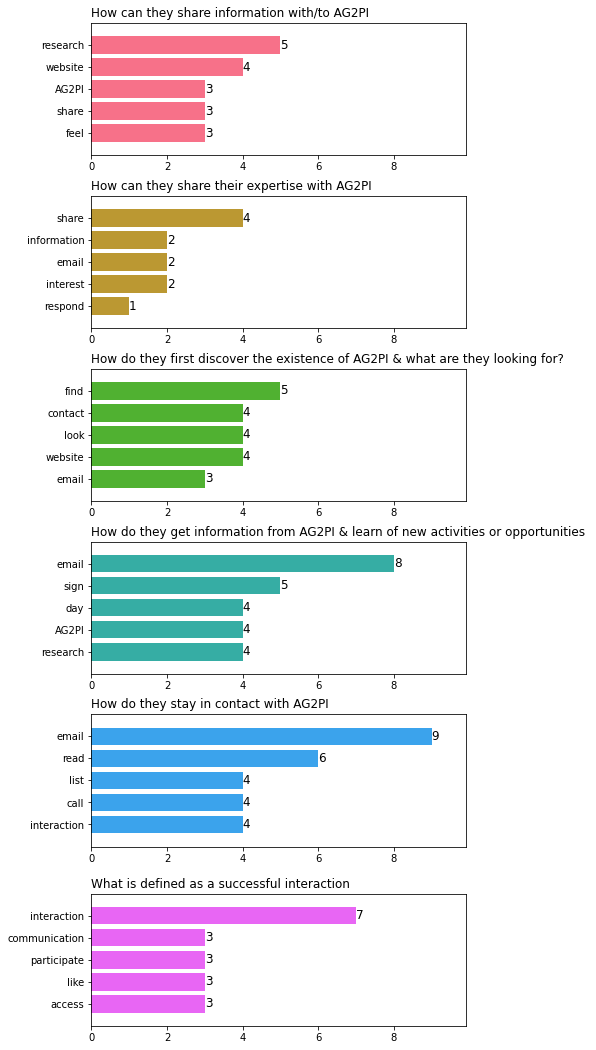

In [75]:
#TODO: space out labels from the edge of bars 
#get lemmas split by values in the Persona Column 
lemmaDict = doc.getColSubAttributeDict("Touchpoint", "importantLemmas")
top4 = doc.getTopFew(lemmaDict, 5)
fig= doc.freqDictBarChartColumnSplit(top4,.3, 2, 10, 1, 0, 10, 6)
#fig.suptitle("Top 5 Terms by Persona", fontsize=18)